In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
import squarify    # pip install squarify (algorithm for treemap)
#from mpl_toolkits.basemap import Basemap
import folium
import json
import bokeh
import pandas as pd
import shapefile as shp
import descartes
from shapely.geometry import Point, Polygon
import fiona
import shapely
%matplotlib inline

In [14]:
hdb_df = pd.read_csv(r'hdb-property-information/hdb-property-information.csv')
hdb = hdb_df[hdb_df['residential'] == 'Y']
market_hawker = hdb_df[hdb_df['market_hawker'] == 'Y']
carpark = hdb_df[hdb_df['multistorey_carpark'] == 'Y']

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
38,1A,TELOK PAKU RD,5,2015,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
41,1A,TOH YI DR,4,1988,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
48,10,BENDEMEER RD,7,2016,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
49,10,CANTONMENT CL,5,2000,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,0,0
71,10A,BEDOK STH AVE 2,5,1992,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,991,BUANGKOK LINK,6,2018,N,Y,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
12415,993,BUANGKOK LINK,8,2019,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,0,0
12427,996,BUANGKOK CRES,8,2018,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,0
12431,997,BUANGKOK CRES,7,2017,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,0,0


In [89]:
hdb['Address'] = hdb['blk_no'] + ' ' + hdb['street']
market_hawker['Address'] = market_hawker['blk_no'] + ' ' + market_hawker['street']
carpark['Address'] = carpark['blk_no'] + ' ' + carpark['street']

C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/3730491638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb['Address'] = hdb['blk_no'] + ' ' + hdb['street']
C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/3730491638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_hawker['Address'] = market_hawker['blk_no'] + ' ' + market_hawker['street']
C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/3730491638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [94]:
import requests
import json
import string

import pandas as pd    
def get_xy(address):
    address_name = address.replace(" ", "+")
    r = requests.get("https://developers.onemap.sg/commonapi/search?searchVal=" + address + "&returnGeom=Y&getAddrDetails=N&pageNum=1")
    elevations = r.json()
    df = pd.json_normalize(elevations['results'])
    ##df_location.head()
    try:
        #return elevations
        ll = list(df[['LATITUDE', 'LONGITUDE']].iloc)
        return float(ll[0][0]), float(ll[0][1])
    except:
        return "Error"

In [72]:
hdb['xy'] = hdb['Address'].apply(lambda x: get_xy(x))

C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/1124339585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb['xy'] = hdb['Address'].apply(lambda x: get_xy(x))


,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Address,xy
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,2,0,0,0,0,0,0,0,1 BEACH RD,"(1.3036713506088, 103.864478660925)"
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,2,0,0,0,0,0,0,0,1 BEDOK STH AVE 1,"(1.32085208990817, 103.933721096337)"
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,92,0,0,0,0,0,0,0,1 CHAI CHEE RD,"(1.32796879176302, 103.922716018139)"
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,1,0,0,0,0,0,0,0,1 CHANGI VILLAGE RD,"(1.3886100383707, 103.988093482829)"
5,1,DELTA AVE,25,1982,Y,N,N,N,N,N,...,96,0,0,0,0,0,0,0,1 DELTA AVE,"(1.2920752508431, 103.828584077626)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,997C,BUANGKOK CRES,16,2017,Y,N,N,N,N,N,...,75,0,0,0,0,0,0,0,997C BUANGKOK CRES,"(1.38553018206225, 103.881587879925)"
12437,998A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,998A BUANGKOK CRES,"(1.38375782968293, 103.880172193688)"
12438,998B,BUANGKOK CRES,17,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,0,0,998B BUANGKOK CRES,"(1.38410075238235, 103.88050459967)"
12440,999A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,136,170,0,0,999A BUANGKOK CRES,"(1.38485483714591, 103.880373866904)"


In [95]:
market_hawker['xy'] = market_hawker['Address'].apply(lambda x: get_xy(x))
carpark['xy'] = carpark['Address'].apply(lambda x: get_xy(x))

C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/670105489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_hawker['xy'] = market_hawker['Address'].apply(lambda x: get_xy(x))
C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/670105489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpark['xy'] = carpark['Address'].apply(lambda x: get_xy(x))


In [96]:
carpark

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Address,xy
38,1A,TELOK PAKU RD,5,2015,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,1A TELOK PAKU RD,"(1.38796658624186, 103.988298872524)"
41,1A,TOH YI DR,4,1988,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,1A TOH YI DR,"(1.33904480982037, 103.774300403826)"
48,10,BENDEMEER RD,7,2016,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,10 BENDEMEER RD,"(1.31550993783628, 103.860952982979)"
49,10,CANTONMENT CL,5,2000,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,10 CANTONMENT CL,"(1.27456974280287, 103.839212088396)"
71,10A,BEDOK STH AVE 2,5,1992,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,10A BEDOK STH AVE 2,"(1.32258561622604, 103.936849426204)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,991,BUANGKOK LINK,6,2018,N,Y,N,N,Y,N,...,0,0,0,0,0,0,0,0,991 BUANGKOK LINK,"(1.38433426615655, 103.881623070164)"
12415,993,BUANGKOK LINK,8,2019,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,993 BUANGKOK LINK,"(1.38511499043052, 103.88362378135)"
12427,996,BUANGKOK CRES,8,2018,N,N,N,N,Y,N,...,0,0,0,0,0,0,0,0,996 BUANGKOK CRES,"(1.38679931180025, 103.882008093894)"
12431,997,BUANGKOK CRES,7,2017,N,N,N,Y,Y,N,...,0,0,0,0,0,0,0,0,997 BUANGKOK CRES,"(1.38544284304831, 103.880763249489)"


In [97]:
carpark_processed = carpark[carpark['xy'] != 'Error']
carpark_processed['lat'] = carpark_processed['xy'].apply(lambda x: x[0])
carpark_processed['long']= carpark_processed['xy'].apply(lambda x: x[1])
market_hawker_processed = market_hawker[market_hawker['xy'] != 'Error']
market_hawker_processed['lat'] = market_hawker_processed['xy'].apply(lambda x: x[0])
market_hawker_processed['long']= market_hawker_processed['xy'].apply(lambda x: x[1])
market_hawker_processed

carpark_processed

C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/3091504012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpark_processed['lat'] = carpark_processed['xy'].apply(lambda x: x[0])
C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/3091504012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpark_processed['long']= carpark_processed['xy'].apply(lambda x: x[1])


,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Address,xy,lat,long
38,1A,TELOK PAKU RD,5,2015,N,N,N,N,Y,N,...,0,0,0,0,0,0,1A TELOK PAKU RD,"(1.38796658624186, 103.988298872524)",1.387967,103.988299
41,1A,TOH YI DR,4,1988,N,N,N,N,Y,N,...,0,0,0,0,0,0,1A TOH YI DR,"(1.33904480982037, 103.774300403826)",1.339045,103.774300
48,10,BENDEMEER RD,7,2016,N,N,N,N,Y,N,...,0,0,0,0,0,0,10 BENDEMEER RD,"(1.31550993783628, 103.860952982979)",1.315510,103.860953
49,10,CANTONMENT CL,5,2000,N,N,N,Y,Y,N,...,0,0,0,0,0,0,10 CANTONMENT CL,"(1.27456974280287, 103.839212088396)",1.274570,103.839212
71,10A,BEDOK STH AVE 2,5,1992,N,N,N,N,Y,N,...,0,0,0,0,0,0,10A BEDOK STH AVE 2,"(1.32258561622604, 103.936849426204)",1.322586,103.936849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,991,BUANGKOK LINK,6,2018,N,Y,N,N,Y,N,...,0,0,0,0,0,0,991 BUANGKOK LINK,"(1.38433426615655, 103.881623070164)",1.384334,103.881623
12415,993,BUANGKOK LINK,8,2019,N,N,N,Y,Y,N,...,0,0,0,0,0,0,993 BUANGKOK LINK,"(1.38511499043052, 103.88362378135)",1.385115,103.883624
12427,996,BUANGKOK CRES,8,2018,N,N,N,N,Y,N,...,0,0,0,0,0,0,996 BUANGKOK CRES,"(1.38679931180025, 103.882008093894)",1.386799,103.882008
12431,997,BUANGKOK CRES,7,2017,N,N,N,Y,Y,N,...,0,0,0,0,0,0,997 BUANGKOK CRES,"(1.38544284304831, 103.880763249489)",1.385443,103.880763


In [82]:
hdb_processed = hdb[hdb['xy'] != 'Error']
hdb_processed['lat'] = hdb_processed['xy'].apply(lambda x: x[0])
hdb_processed['long']= hdb_processed['xy'].apply(lambda x: x[1])
hdb_processed

C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/2196874945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb_processed['lat'] = hdb_processed['xy'].apply(lambda x: x[0])
C:\Users\alvin\AppData\Local\Temp/ipykernel_6340/2196874945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdb_processed['long']= hdb_processed['xy'].apply(lambda x: x[1])


,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Address,xy,lat,long
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,0,0,0,0,0,0,1 BEACH RD,"(1.3036713506088, 103.864478660925)",1.303671,103.864479
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,0,0,0,0,0,0,1 BEDOK STH AVE 1,"(1.32085208990817, 103.933721096337)",1.320852,103.933721
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,0,0,0,0,0,1 CHAI CHEE RD,"(1.32796879176302, 103.922716018139)",1.327969,103.922716
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,0,0,0,0,0,0,1 CHANGI VILLAGE RD,"(1.3886100383707, 103.988093482829)",1.388610,103.988093
5,1,DELTA AVE,25,1982,Y,N,N,N,N,N,...,0,0,0,0,0,0,1 DELTA AVE,"(1.2920752508431, 103.828584077626)",1.292075,103.828584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,997C,BUANGKOK CRES,16,2017,Y,N,N,N,N,N,...,0,0,0,0,0,0,997C BUANGKOK CRES,"(1.38553018206225, 103.881587879925)",1.385530,103.881588
12437,998A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,998A BUANGKOK CRES,"(1.38375782968293, 103.880172193688)",1.383758,103.880172
12438,998B,BUANGKOK CRES,17,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,998B BUANGKOK CRES,"(1.38410075238235, 103.88050459967)",1.384101,103.880505
12440,999A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,136,170,0,0,999A BUANGKOK CRES,"(1.38485483714591, 103.880373866904)",1.384855,103.880374


In [83]:
locations = [Point(xy) for xy in zip(hdb_processed['long'], hdb_processed['lat'])]
crs = {'init': 'epsg:4326'}
hdb_processed_df = gpd.GeoDataFrame(hdb_processed, crs = crs, geometry = locations)

In [99]:
locations = [Point(xy) for xy in zip(carpark_processed['long'], carpark_processed['lat'])]
crs = {'init': 'epsg:4326'}
carpark_processed_df = gpd.GeoDataFrame(carpark_processed, crs = crs, geometry = locations)

In [101]:
locations = [Point(xy) for xy in zip(market_hawker_processed['long'], market_hawker_processed['lat'])]
crs = {'init': 'epsg:4326'}
market_hawker_processed_df = gpd.GeoDataFrame(market_hawker_processed, crs = crs, geometry = locations)

C:\Users\alvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

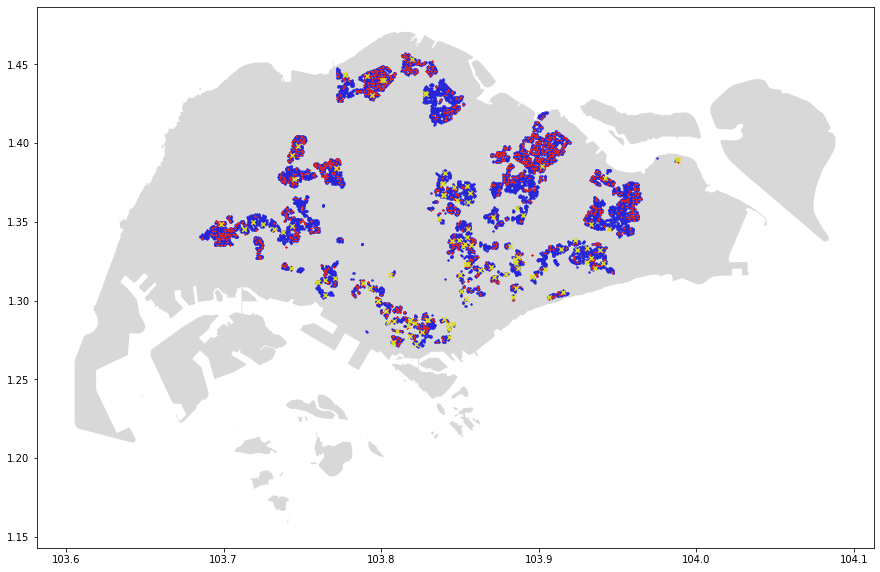

In [106]:
singapore_map = gpd.read_file('Planning Area Census/Planning_Area_Census2010.shp')
singapore_map = singapore_map.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize = (15,15))
hdb_processed_df.plot(ax = ax, markersize = 2, color = "blue", marker = "o", label = "HDB")
carpark_processed_df.plot(ax = ax, markersize = 2, color = "red", marker = "x", label = "Carpark")
market_hawker_processed_df.plot(ax = ax, markersize = 20, color = "yellow", marker = "x", label = "Market/Hawker")
singapore_map.plot(ax = ax, alpha = 0.3, color = "grey")

In [124]:
hdb_processed_df = hdb_processed_df.drop(['xy'], axis = 1)

In [125]:
market_hawker_processed_df.to_file('markethawker_shapefile.shp')
carpark_processed_df.to_file('carpark_shapefile.shp')
hdb_processed_df.to_file('hdb_shapefile.shp')